In [1]:
%matplotlib inline
import cPickle as pickle
from __future__ import division, print_function
from datetime import datetime, date
import pandas as pd
import numpy as np
import scipy.stats
import logging
import matplotlib.pyplot as plt
# logging.basicConfig(level=logging.INFO)
import factor_analytics
reload(factor_analytics)
from factor_analytics import *
import seaborn as sns
sns.set()

In [2]:
plt.rcParams["figure.figsize"] = (18,10)

In [3]:
with open('cur_mkt_cap.pkl', 'rb') as f:
    exposures = pickle.load(f)

IOError: [Errno 2] No such file or directory: 'cur_mkt_cap.pkl'

In [ ]:
with open('book_to_px.pkl', 'rb') as f:
    exposures = pickle.load(f)

In [ ]:
with open('russell_prices_with_delisting.pkl', 'rb') as f:
    prices = pickle.load(f)

In [5]:
lags = [1,5,21,63,126,252]

In [18]:
%%time
IC_df = pd.DataFrame()
for lag in lags:
    forward_rets = prices.pct_change(lag).shift(-lag).dropna(how='all')
    IC_series = calculate_IC(exposures, forward_rets)
    IC_df[lag] = IC_series

CPU times: user 2min 7s, sys: 4.45 s, total: 2min 11s
Wall time: 2min 11s


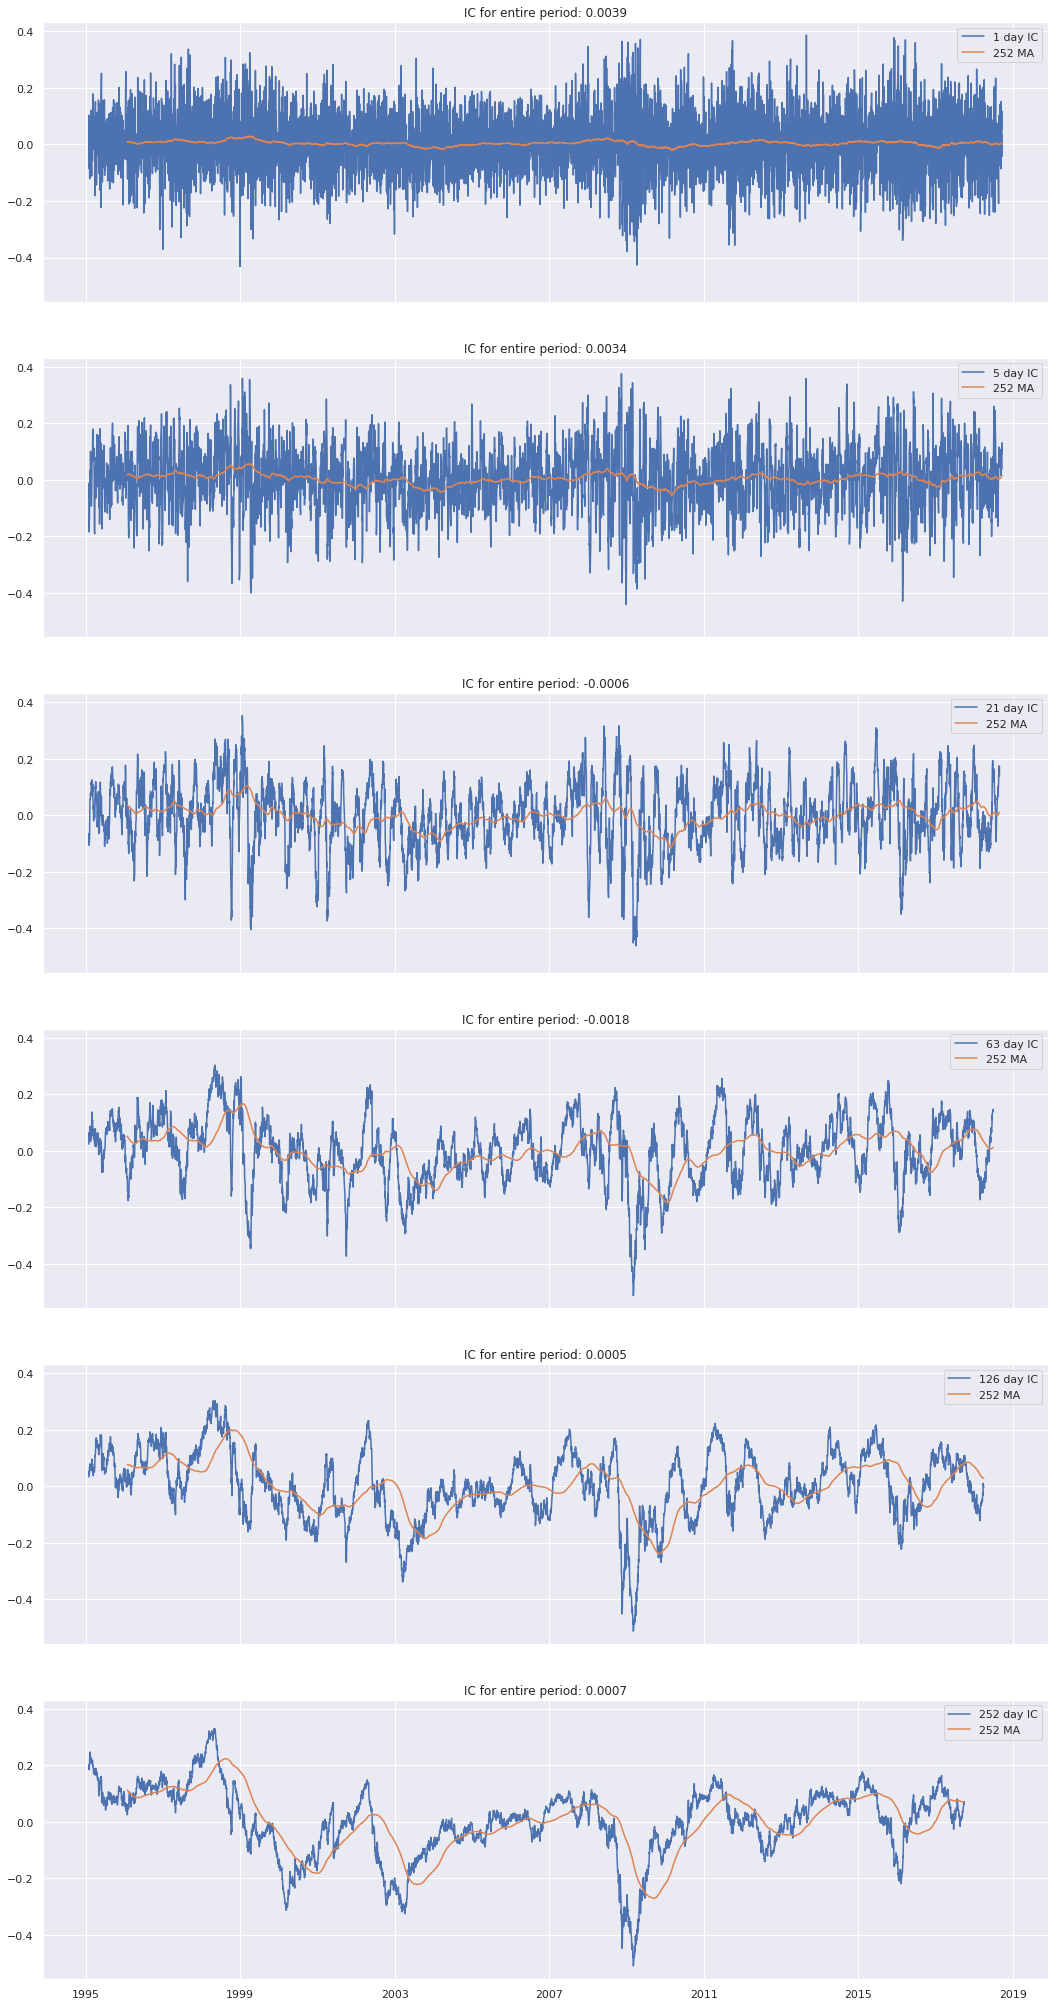

In [20]:
f, axes = plt.subplots(len(lags), 1, sharex=True, sharey=True, figsize=(18,36))
for lag, ax in zip(lags, axes):
    ax.plot(IC_df.index, IC_df[lag], label="{} day IC".format(lag))
    ax.plot(IC_df.index, IC_df[lag].rolling(252).mean(), label="252 MA".format(lag))
    ax.legend()
    ax.set_title("IC for entire period: {:.4f}".format(IC_df[lag].mean()))

In [21]:
resampled       = IC_df.resample('8Y').mean().T
resampled_error = IC_df.resample('8Y').std().T

In [22]:
resampled.T

1         5         21        63        126       252
1995-12-31  0.007434  0.014554  0.029180  0.059542  0.081499  0.117400
2003-12-31  0.004810  0.004428 -0.002111 -0.004606  0.002662 -0.008027
2011-12-31  0.002597 -0.001451 -0.011482 -0.021009 -0.026246 -0.025491
2019-12-31  0.003749  0.006382  0.010074  0.016490  0.020137  0.030491

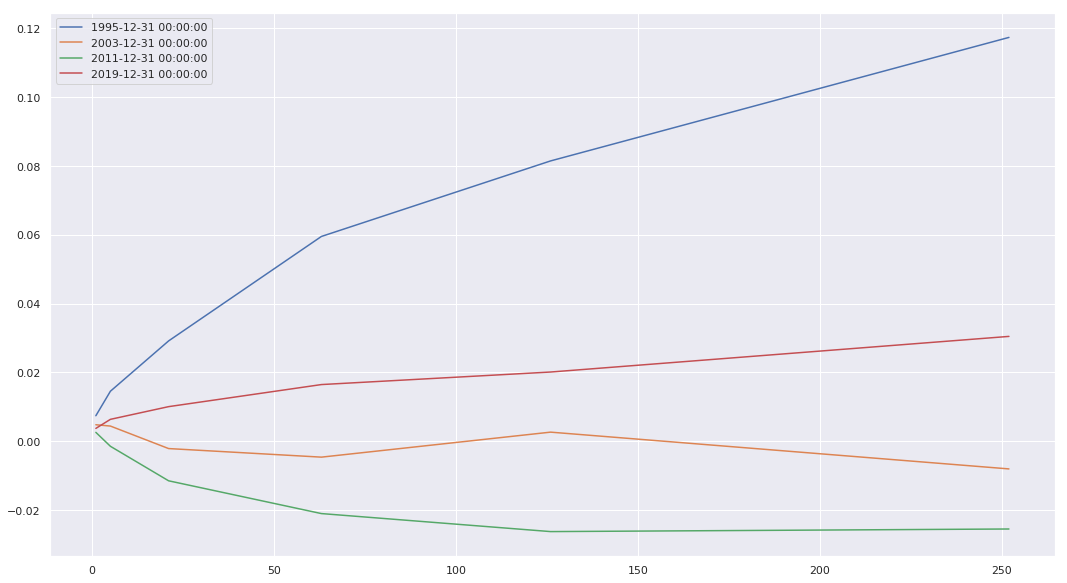

In [23]:
resampled.plot()

In [24]:
def plot_with_confidence(values, errors, alpha=0.1):

    for col in values.columns:
        plt.plot(values.index, values[col])
        plt.fill_between(values.index, values[col]-1.96*errors[col], values[col]+1.96*errors[col], alpha=alpha)

    plt.legend()

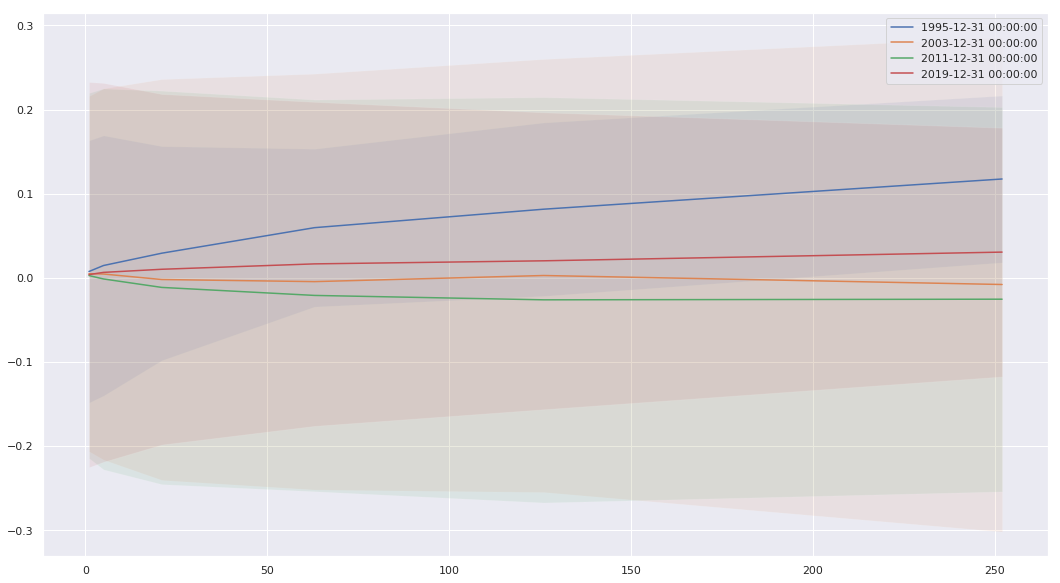

In [25]:
plot_with_confidence(resampled, resampled_error)